# **Easy Visa - Coded Project**

## **Context**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## **Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## **Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.
* **case_id:** ID of each visa application
* **continent:** Information of continent the employee
* **education_of_employee:** Information of education of the employee
* **has_job_experience:** Does the employee has any job experience? Y= Yes; N = No
* **requires_job_training:** Does the employee require any job training? Y = Yes; N = No
* **no_of_employees:** Number of employees in the employer's company
* **yr_of_estab:** Year in which the employer's company was established
* **region_of_employment:** Information of foreign worker's intended region of employment in the US.
* **prevailing_wage:** Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* **unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* **full_time_position:** Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* **case_status:** Flag indicating if the Visa was certified or denied

## **Importing the Libraries**

In [ ]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries for data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to impute missing values
from sklearn.impute import SimpleImputer

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


## **Loading the Data**

In [ ]:
# For fething the data from Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv')

In [ ]:
df=data.copy()

## **Data Overview**

In [ ]:
df.shape

(25480, 12)

In [ ]:
#To check the Top 5 and botton 5 records in the dataset
df.head(-5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Notes**
* The data contains 25480 obeservations and 12 features.
* Of these 12 features, 9 are categorical variables and 3 are numerical variables.
* There are no null values in the dataset

### **Checking if there is any null values**

In [ ]:

df.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


**Notes**

* There are no missing values in the dataset

### **Checking if there is any duplicate values**

In [ ]:
# To check if there is any duplicate values in the dataset.
df[df.duplicated()].count()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


**Notes**

* There are no duplicate values in the dataset

### **Checking Statistical Summary**

In [ ]:
#To check the Statistical Summary of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Notes**

* **no_of_employees** column is having min value as -26 which indicates there are some invalid data in this column that needs to be handled.
* 75% of companies in the dataset are having around 3504 employees and the maximum employee count in a company is 602069 which indicates there are outliers in the column
* There are companies founded since 1800 and the recently started company which founded on 2016.
* Prevailing wage varies significantly between **\$ 2.13** to **\$ 319210**.


In [ ]:
#To check the Statistical Summary of the Categorical variables
df.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [ ]:
cat_columns = df.select_dtypes(include='object').columns

for col in cat_columns:
  print('Unique Values in Column:',col, 'are :')
  print(df[col].value_counts())
  print('*'*50)

Unique Values in Column: case_id are :
case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
**************************************************
Unique Values in Column: continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique Values in Column: education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique Values in Column: has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique Values in Column: r

**Notes**

* Most of the employees are from Asia
* Out of 4 educational levels, most employees hold a Bachelor's degree.
* Majority of applicants have relevant work experience and most of the applications do not require job trainings.
* Northeast region has the highest demand among employees.
* Majority of the employments are for full time positions.
* Wages is provided on 4 different units and most of the applications are for Yearly pay.
* More than 60% of the applications have Visa status as Certified and the remaining as Denied . Hence we have enough records to train and test the models with both the conditions.

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on no_of_employees

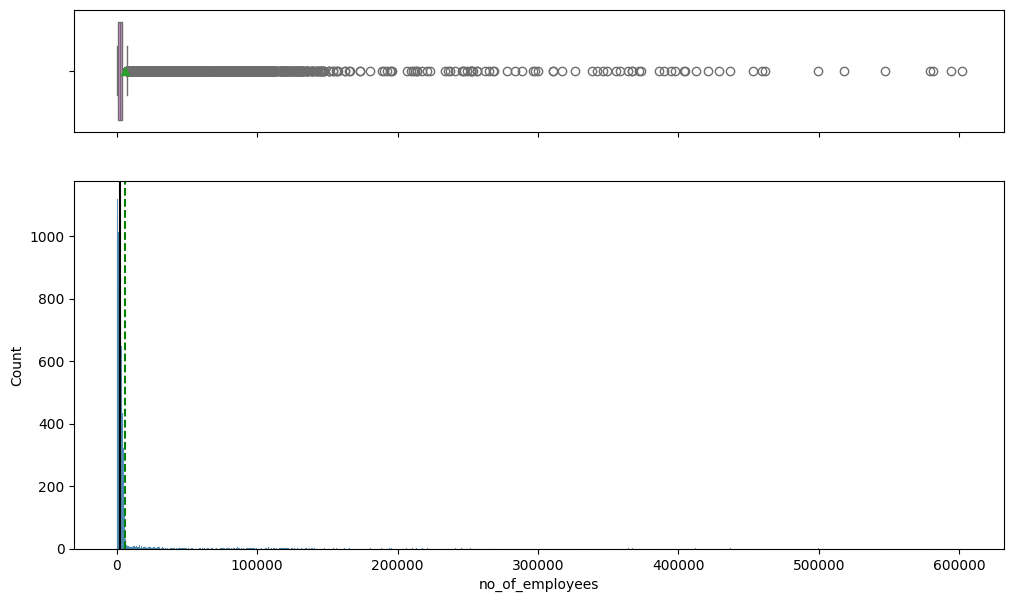

In [ ]:
histogram_boxplot(df, "no_of_employees")

**Notes**

* The data shows an extremely right-skewed distribution for the number of employees.
* The vast majority of data points are clustered very close to zero, indicating that most of the companies in the dataset have a very small number of employees.
* There are numerous outliers on the right side of the distribution extending all the way to about 600,000 employees.

#### Observations on yr_of_estab

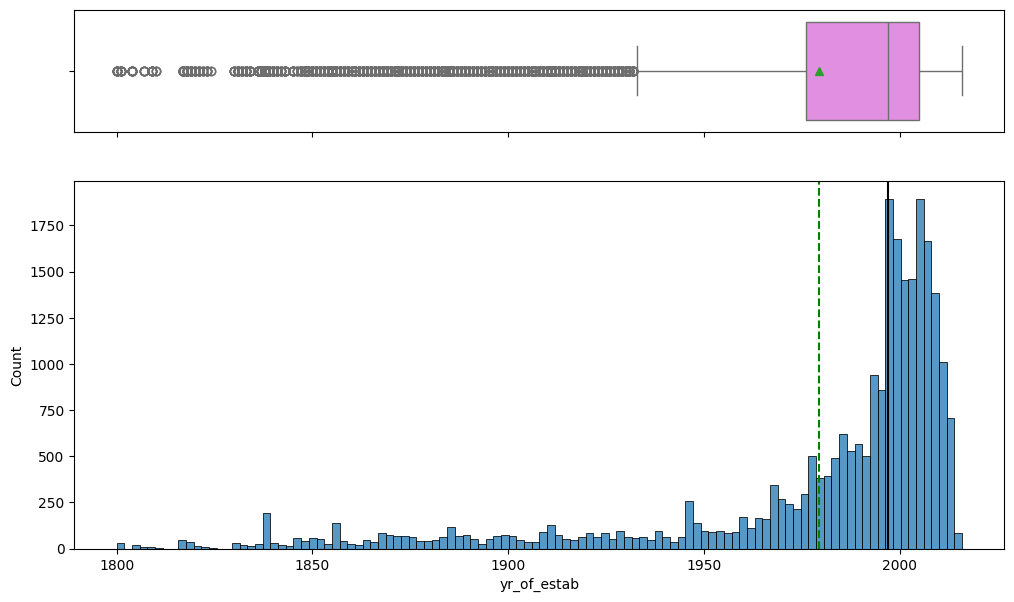

In [ ]:
histogram_boxplot(df, "yr_of_estab")

**Notes**

* The data shows an left-skewed distribution for the yr_of_estab.
* The 'yr_of_estab' shows most companies were established between 1950 and 2010, with a peak around 2000-2010.
* There are some older companies dating back to the early 1800s.

#### Observations on prevailing_wage

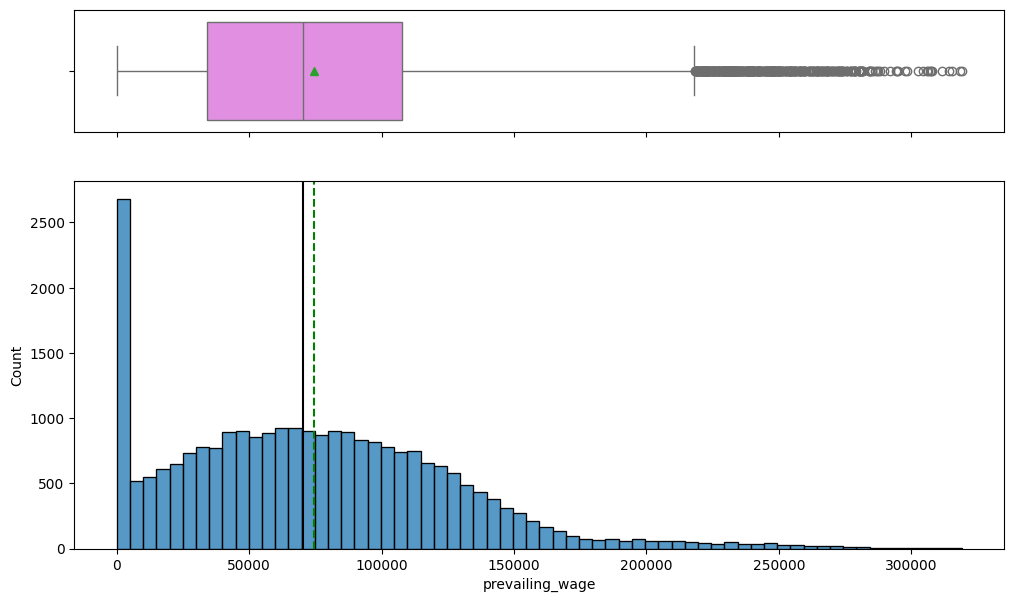

In [ ]:
histogram_boxplot(df, "prevailing_wage")

**Notes**

* The 'prevailing_wage' distribution is also right-skewed, with most wages falling between \$25,000 and \$150,000 per year.
* There are some high outliers above \$250,000.
* This column contains the wages per hour , week, month and year. So we will check this again during the Feature Engineering

#### Observations on continent

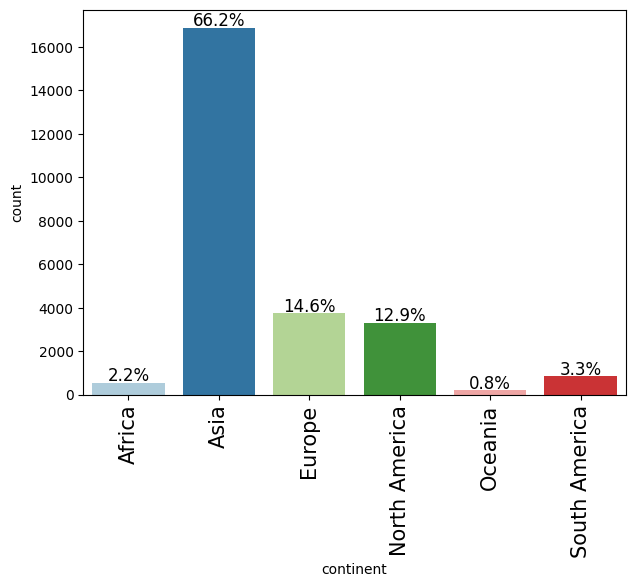

In [ ]:
labeled_barplot(df, 'continent')

**Notes**

* 66% of the contestants are from Asia and the least are from Oceania.
* North America is the second highest continent about the no. of employess with around 13%.
* Other continents have minimal representation.


#### Observations on education_of_employee

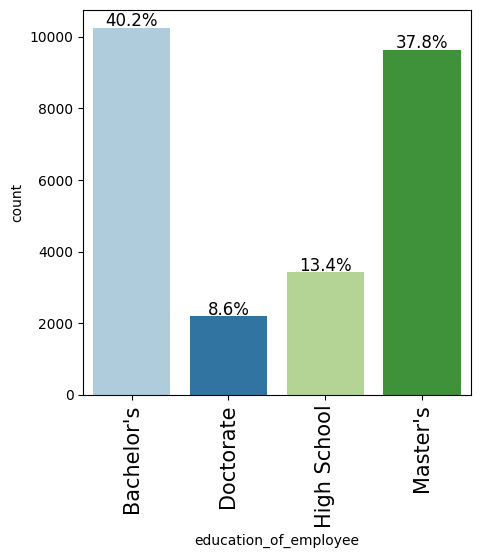

In [ ]:
labeled_barplot(df, 'education_of_employee')

**Notes**

* Bachelor's degree holders are the most common with about 40% of the total employees.
* Master's degree holders follow closely with around 38%.
* Other education levels have much lower representation.

#### Observations on has_job_experience

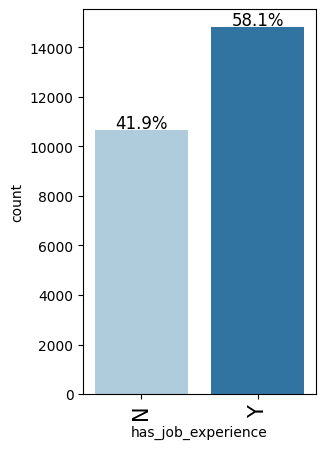

In [ ]:
labeled_barplot(df, 'has_job_experience')

**Notes**

* About 58% of applicants have job experience.
* 42% do not have job experience.

#### Observations on requires_job_training

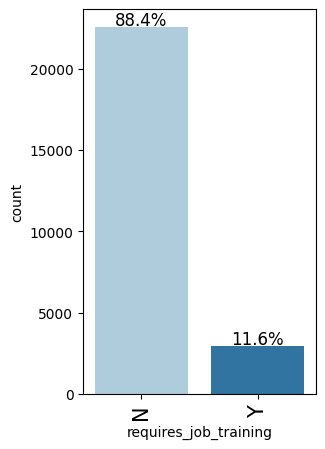

In [ ]:
labeled_barplot(df, 'requires_job_training')

**Notes**

* The vast majority (about 88%) do not require job training.
* Only about 11% require job training.

#### Observations on region_of_employment

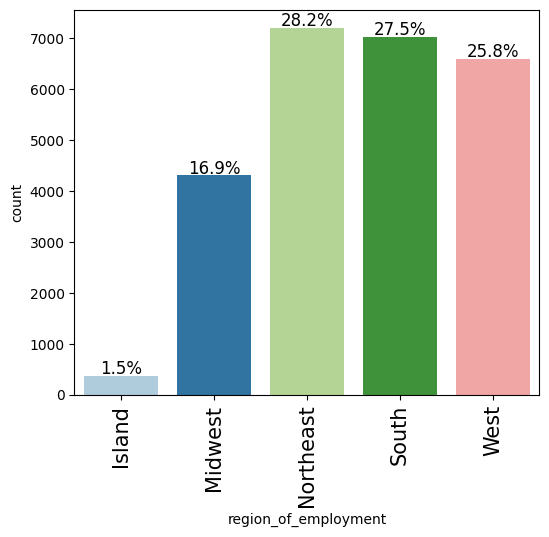

In [ ]:
labeled_barplot(df, 'region_of_employment')

**Notes**

* Northeast region has the highest demand among employees.
* South follows closedly with about 27% of employees.
* Island is the region with least interest among employees.

#### Observations on unit_of_wage

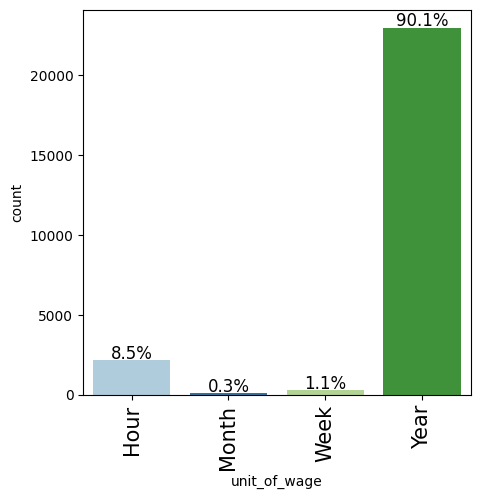

In [ ]:
labeled_barplot(df, 'unit_of_wage')

**Notes**

* Year is the predominant unit (about 90% of cases).
* Less employers are offering wages per Hour, Month, and Week.

#### Observations on full_time_position

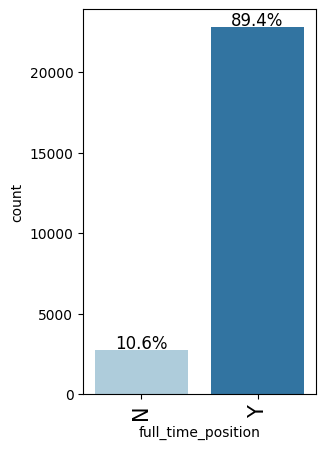

In [ ]:
labeled_barplot(df, 'full_time_position')

**Notes**

* Almost all employment positions (about 90%) are full-time.
* Only about 10% are not full-time jobs.

#### Observations on case_status

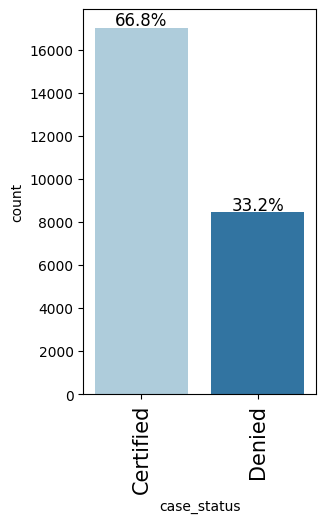

In [ ]:
labeled_barplot(df, 'case_status')

**Notes**

* Around 67% of the total applicants got Visa certified with remaining 33% with Denials

### **Bivariate Analysis**

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Continent Vs Case_status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


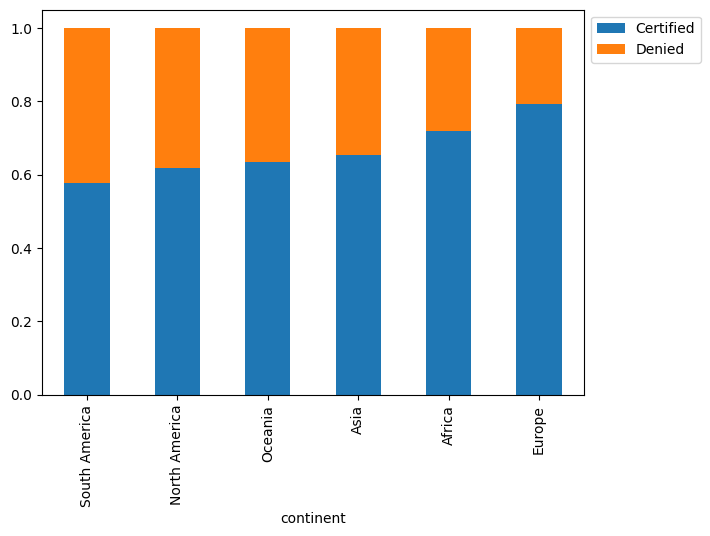

In [ ]:
stacked_barplot(df, "continent", "case_status")

**Notes :**
* Europe is the continent with most Visa Certified count followed by Africa.
* Visa denials are more on South America.

#### education_of_employee Vs Case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


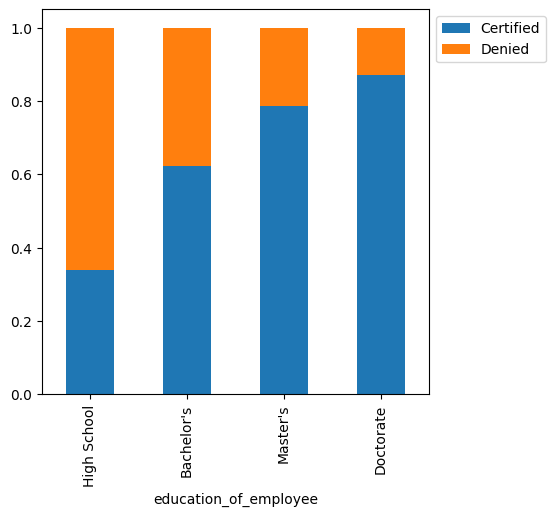

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

**Notes :**
* Employees with Doctorate has high chance of getting Visa certified while the least chance for the applicants with High School as the top education level

#### has_job_experience Vs Case_status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


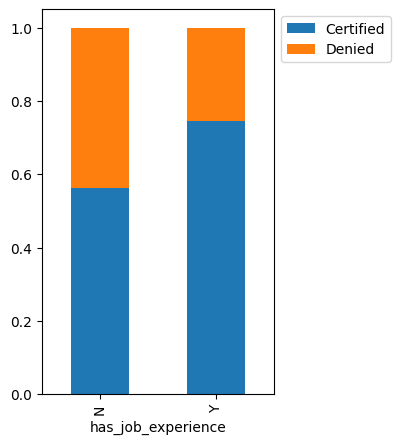

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

**Notes :**
* Employees with job experience has high chance of getting Visa certified compared to those without job experience

#### requires_job_training Vs Case_status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


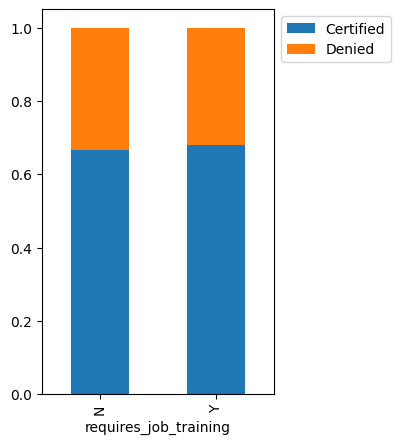

In [ ]:
stacked_barplot(df, "requires_job_training", "case_status")

**Notes :**
* Job training requirement does not have any significance on getting the Visa certified.

#### region_of_employment Vs Case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


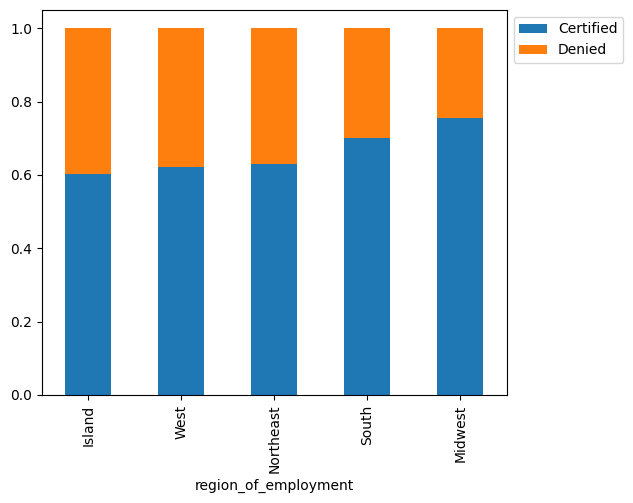

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")

**Notes :**
* Midwest region has the highest number of Visa Certified cases followed by South region.
* Visa cerified counts are almost same for island, west and Northeast regions.

#### unit_of_wage Vs Case_status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


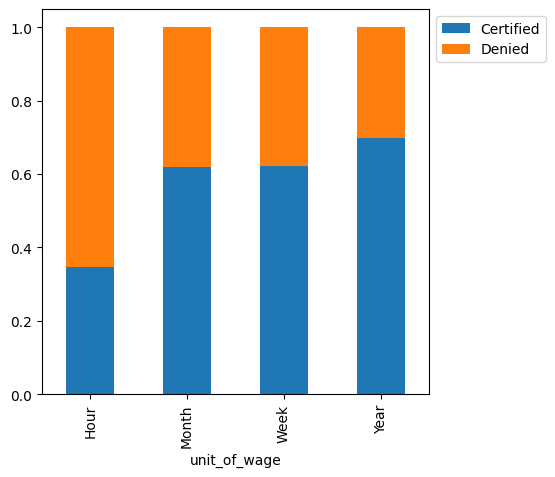

In [ ]:
stacked_barplot(df, "unit_of_wage", "case_status")

**Notes :**
* Certified cases are hfor the positions with Year as the unit of wage.
* The least in the list is month as unit of wage

#### full_time_position Vs Case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


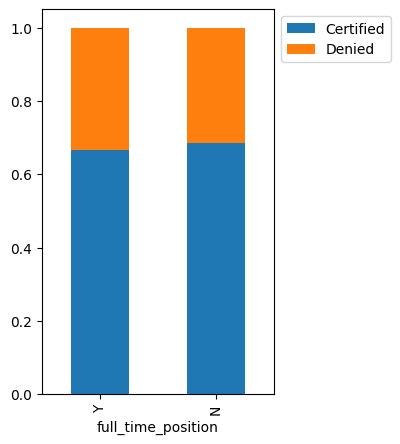

In [ ]:
stacked_barplot(df, "full_time_position", "case_status")

**Notes :**
* Full time position also does not have much effect on getting the Visa certified.

In [ ]:
def grouped_bar_chart(data, cat_col1, cat_col2, title="Grouped Bar Chart", xlabel="Categories", ylabel="Counts"):
    # Count occurrences of each combination of categories
    counts = data.groupby([cat_col1, cat_col2]).size().unstack(fill_value=0)

    # Plotting
    ax = counts.plot(kind='bar', figsize=(10, 6))

    # Customizing the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title=cat_col2)
    plt.tight_layout()

    # Show the plot
    plt.show()


#### Continent Vs education_of_employee

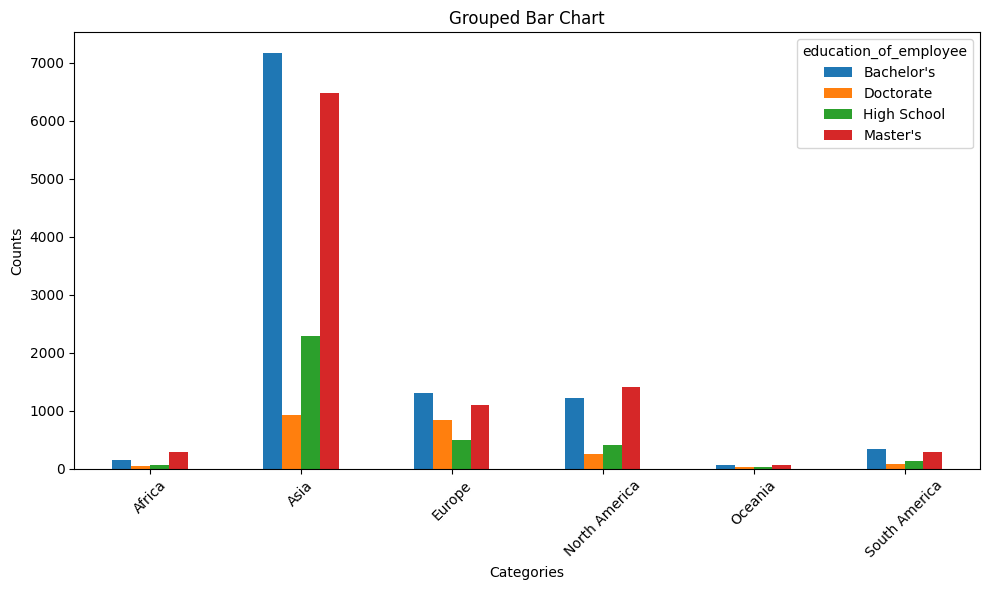

In [ ]:
grouped_bar_chart(df,'continent','education_of_employee')

**Notes:**

* Of all the continents, the no. of applicants are highest from Asia
* The no. of applicants with Bachelor's or Master's degree are highest in all these continents.
* From the Plot, it is evident that no. of foreign applicants are more compared to the US applicatns.

### **Multivariate Analysis**

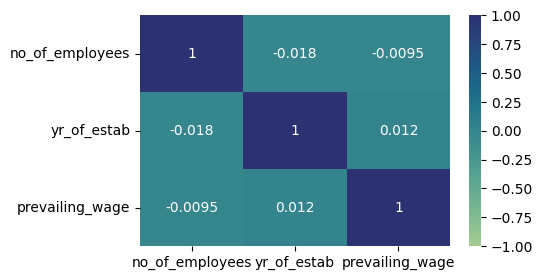

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(numeric_only = True),annot=True,vmin=-1,vmax=1,cmap='crest')
plt.show()

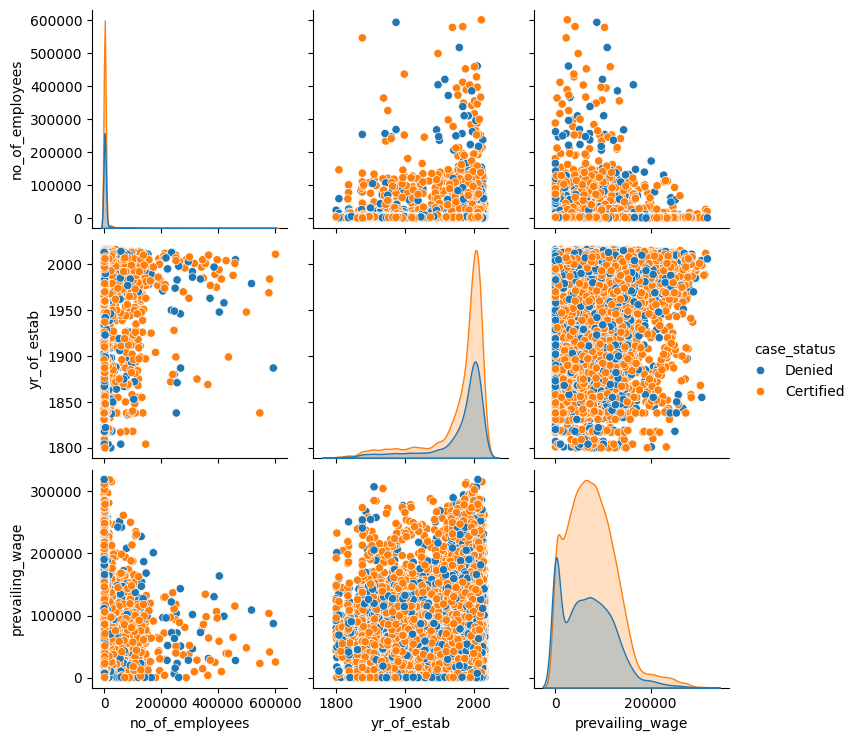

In [ ]:
sns.pairplot(data=df, hue="case_status")
plt.show()

**Notes :**
* From the above 2 plots, it is clear that there are no correlations for the numerical variables with case_status

## **Data Preprocessing**

In [ ]:
df[df['no_of_employees']<0].sum()

,0
case_id,33
continent,33
education_of_employee,33
has_job_experience,33
requires_job_training,33
no_of_employees,33
yr_of_estab,33
region_of_employment,33
prevailing_wage,33
unit_of_wage,33


As the no. of records with negative values is 33 out of total , we wil be just dropping these records after splitting the data into train, test and validation to avoid data leakage

### **Outlier Treatment**

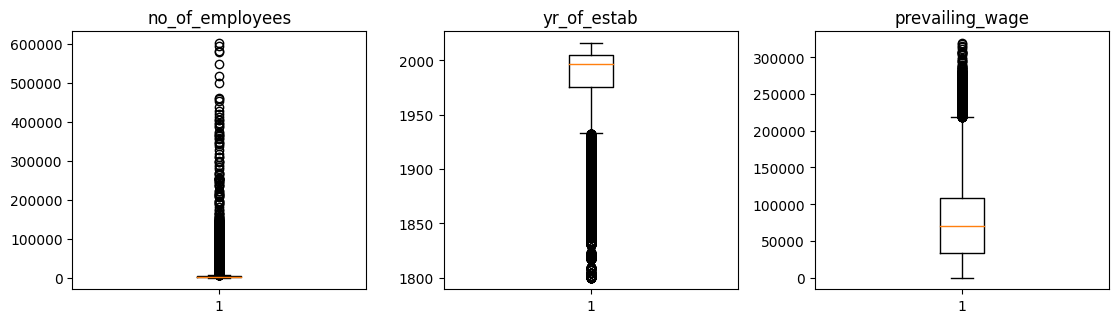

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Although there are outliers in the above fields, we will keep them as they are significant values

## **Feature Engineering**

In [ ]:
  # Generally speaking, a work year is usually 2080 work hours
  # Total number of average working hours in a month this way: 40 hours per week x 52 weeks per year / 12 months = 173 working hours a month
  # According to US labor law, a full-time working week is equal to 40 hours

df["hourly_wage"] = df["prevailing_wage"]
df.loc[data.unit_of_wage == "Year", "hourly_wage"] = (
    df.loc[df.unit_of_wage == "Year", "hourly_wage"] / 2080.0
)
df.loc[df.unit_of_wage == "Month", "hourly_wage"] = (
    df.loc[df.unit_of_wage == "Month", "hourly_wage"] / 173.0
)
df.loc[df.unit_of_wage == "Week", "hourly_wage"] = (
    df.loc[df.unit_of_wage == "Week", "hourly_wage"] / 40.0
)

In [ ]:
# Dropping prevailing_wage
# Dropping case_id as this column does not have any significance

df.drop(['prevailing_wage','case_id'], axis=1, inplace=True)

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,unit_of_wage,full_time_position,case_status,hourly_wage
0,Asia,High School,N,N,14513,2007,West,Hour,Y,Denied,592.202900
1,Asia,Master's,Y,N,2412,2002,Northeast,Year,Y,Certified,40.108486
2,Asia,Bachelor's,N,Y,44444,2008,West,Year,Y,Denied,59.133106
3,Asia,Bachelor's,N,N,98,1897,West,Year,Y,Denied,40.112514
4,Africa,Master's,Y,N,1082,2005,South,Year,Y,Certified,72.070861


In [ ]:
# Example DataFrame
df['company_size'] = pd.cut(df['no_of_employees'],
                                  bins=[0, 1000, 5000, 20000, float('inf')],
                                  labels=['Small', 'Medium', 'Large', 'Very Large'])

In [ ]:
df['company_size'].value_counts()

,count
company_size,
Medium,16602
Small,6208
Large,1572
Very Large,1065


In [ ]:
#dropping no_of_employee
df.drop("no_of_employees", axis=1, inplace=True)

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,yr_of_estab,region_of_employment,unit_of_wage,full_time_position,case_status,hourly_wage,company_size
0,Asia,High School,N,N,2007,West,Hour,Y,Denied,592.202900,Large
1,Asia,Master's,Y,N,2002,Northeast,Year,Y,Certified,40.108486,Medium
2,Asia,Bachelor's,N,Y,2008,West,Year,Y,Denied,59.133106,Very Large
3,Asia,Bachelor's,N,N,1897,West,Year,Y,Denied,40.112514,Small
4,Africa,Master's,Y,N,2005,South,Year,Y,Certified,72.070861,Medium


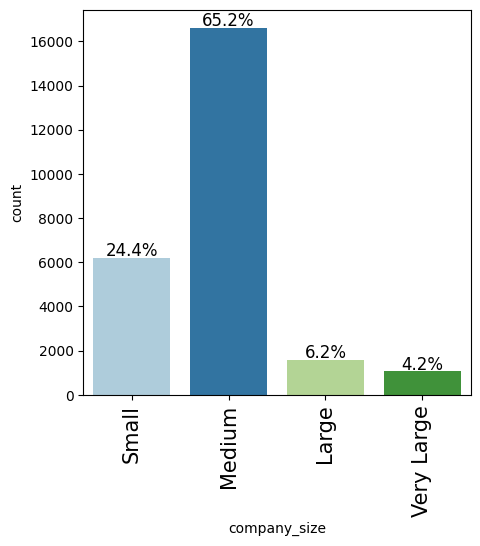

In [ ]:
labeled_barplot(df, 'company_size')

case_status   Certified  Denied    All
company_size                          
All               17001    8446  25447
Medium            11052    5550  16602
Small              4091    2117   6208
Large              1127     445   1572
Very Large          731     334   1065
------------------------------------------------------------------------------------------------------------------------


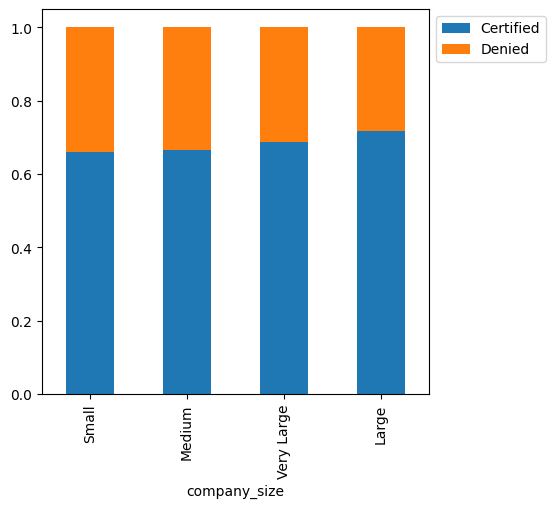

In [ ]:
stacked_barplot(df, 'company_size','case_status')

**Notes**

* From the above plots, most of the applications are for the Medium size companies where the employee count is 1000-5000.
* The least applications are for Large and very-large sized companies where the employee count is >5000.
* However the company_size does not have any significant impact on visa approvals.

In [ ]:
#create bins to categorize companies by the number of years since the company was founded
bins = [0,1924,1974,2014,np.inf]
names = ['>100yrs','50-100','10-50','<10yrs']
#assign each applicant to a category which indicates how long the company has been in business (i.e., a proxy for how well-established the company is)
df['company_age'] = pd.cut(df['yr_of_estab'], bins, labels=names)
df.company_age.value_counts()


,count
company_age,
10-50,19216
50-100,3214
>100yrs,2963
<10yrs,87


In [ ]:
#dropping yr_of_estab
df.drop("yr_of_estab", axis=1, inplace=True)

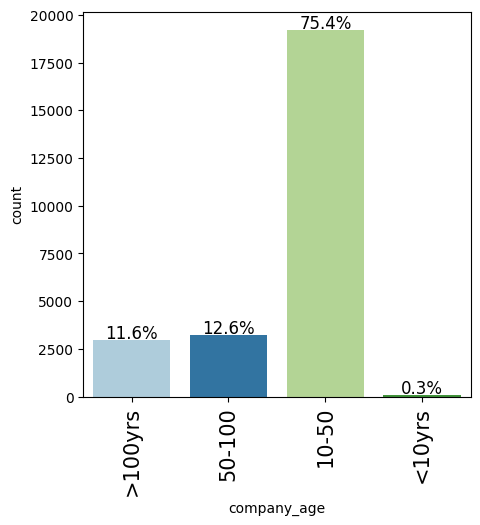

In [ ]:
labeled_barplot(df, 'company_age')

case_status  Certified  Denied    All
company_age                          
All              17018    8462  25480
10-50            12865    6351  19216
50-100            2116    1098   3214
>100yrs           1988     975   2963
<10yrs              49      38     87
------------------------------------------------------------------------------------------------------------------------


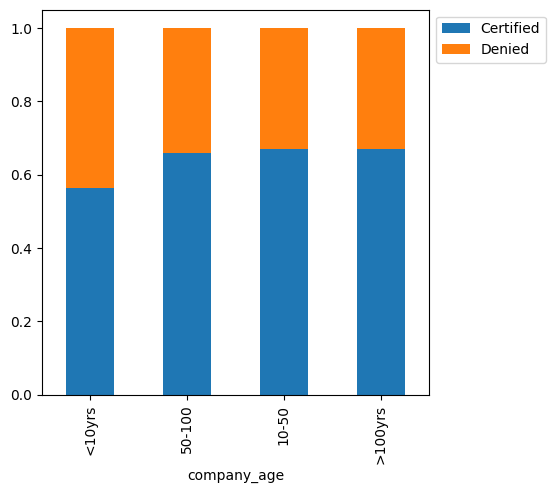

In [ ]:
stacked_barplot(df, 'company_age','case_status')

**Notes**

* From the above plots, most of the applications are for the companies that are between 10-50 years old.
* The least applications are for companies founded in last 10 years.
* However the company_size does not have any significant impact on visa approvals.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  object  
 1   education_of_employee  25480 non-null  object  
 2   has_job_experience     25480 non-null  object  
 3   requires_job_training  25480 non-null  object  
 4   region_of_employment   25480 non-null  object  
 5   unit_of_wage           25480 non-null  object  
 6   full_time_position     25480 non-null  object  
 7   case_status            25480 non-null  object  
 8   hourly_wage            25480 non-null  float64 
 9   company_size           25447 non-null  category
 10  company_age            25480 non-null  category
dtypes: category(2), float64(1), object(8)
memory usage: 1.8+ MB


In [ ]:
#converting all the object type variables to category
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda x: x.astype('category'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   region_of_employment   25480 non-null  category
 5   unit_of_wage           25480 non-null  category
 6   full_time_position     25480 non-null  category
 7   case_status            25480 non-null  category
 8   hourly_wage            25480 non-null  float64 
 9   company_size           25447 non-null  category
 10  company_age            25480 non-null  category
dtypes: category(10), float64(1)
memory usage: 449.7 KB


In [ ]:
# Encoding Categorical Data
# has_job_experience
# requires_job_training
# full_time_position
# case_status

# Replace 'Y' with 1 and 'N' with 0
df.has_job_experience = df.has_job_experience.apply(lambda x: 1 if x == "Y" else 0)
df.requires_job_training = df.requires_job_training.apply(lambda x: 1 if x == "Y" else 0)
df.full_time_position = df.full_time_position.apply(lambda x: 1 if x == "Y" else 0)
df.case_status = df.case_status.apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status,hourly_wage,company_size,company_age
0,Asia,High School,0,0,West,Hour,1,0,592.202900,Large,10-50
1,Asia,Master's,1,0,Northeast,Year,1,1,40.108486,Medium,10-50
2,Asia,Bachelor's,0,1,West,Year,1,0,59.133106,Very Large,10-50
3,Asia,Bachelor's,0,0,West,Year,1,0,40.112514,Small,>100yrs
4,Africa,Master's,1,0,South,Year,1,1,72.070861,Medium,10-50


## **Data Preparation for Modeling**

### **i. Feature Engineering**

In [ ]:
df['company_age'].value_counts()

,count
company_age,
10-50,19216
50-100,3214
>100yrs,2963
<10yrs,87


In [ ]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
education_of_employee = {"High School": 0, "Bachelor's": 1, "Master's": 2,"Doctorate": 3}
df["education_of_employee"] = df["education_of_employee"].map(education_of_employee)

unit_of_wage = {"Hour": 0, "Week": 1, "Month": 2,"Year": 3}
df["unit_of_wage"] = df["unit_of_wage"].map(unit_of_wage)

company_size = {"Small": 0, "Medium": 1, "Large": 2,"Very Large": 3}
df["company_size"] = df["company_size"].map(company_size)


company_age = {"<10yrs": 0, "10-50": 1, "50-100": 2,">100yrs": 3}
df["company_age"] = df["company_age"].map(company_age)



In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status,hourly_wage,company_size,company_age
0,Asia,0,0,0,West,0,1,0,592.202900,2,1
1,Asia,2,1,0,Northeast,3,1,1,40.108486,1,1
2,Asia,1,0,1,West,3,1,0,59.133106,3,1
3,Asia,1,0,0,West,3,1,0,40.112514,0,3
4,Africa,2,1,0,South,3,1,1,72.070861,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   region_of_employment   25480 non-null  category
 5   unit_of_wage           25480 non-null  category
 6   full_time_position     25480 non-null  category
 7   case_status            25480 non-null  category
 8   hourly_wage            25480 non-null  float64 
 9   company_size           25447 non-null  category
 10  company_age            25480 non-null  category
dtypes: category(10), float64(1)
memory usage: 449.7 KB


### **ii. Splitting the data for Modelling**

In [ ]:
X = df.drop(["case_status"], axis=1)
y = df["case_status"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(12485, 10) (5351, 10) (7644, 10)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 12485
Number of rows in validation data = 5351
Number of rows in test data = 7644


### Missing Value Treatment

In [ ]:
# let's check for duplicate values in the data
df.duplicated().count()

25480

In [ ]:
# let's check for missing values in the data
df.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
region_of_employment,0
unit_of_wage,0
full_time_position,0
case_status,0
hourly_wage,0
company_size,33


In [ ]:

round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
continent,0.00
education_of_employee,0.00
has_job_experience,0.00
requires_job_training,0.00
region_of_employment,0.00
unit_of_wage,0.00
full_time_position,0.00
case_status,0.00
hourly_wage,0.00
company_size,0.13


**Note:**

There are Missing values in the column Company_size due to the non-positive values that were present in the no_of_employees column.


In [ ]:

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train['company_size'] = cat_imputer.fit_transform(X_train[['company_size']])
X_val['company_size'] = cat_imputer.transform(X_val[['company_size']])
X_test['company_size'] = cat_imputer.transform(X_test[['company_size']])

In [ ]:
# let's check for missing values in the data again
print('X_Train - Missing Values')
print(X_train.isnull().sum())
print('X_Val - Missing Values')
print(X_val.isnull().sum())
print('X_Test - Missing Values')
print(X_test.isnull().sum())


X_Train - Missing Values
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
hourly_wage              0
company_size             0
company_age              0
dtype: int64
X_Val - Missing Values
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
hourly_wage              0
company_size             0
company_age              0
dtype: int64
X_Test - Missing Values
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
hourly_wage              0
company_size             0
company_age              0
dtype: int64


#### Train Dataset

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             8270
Europe           1822
North America    1584
South America     440
Africa            278
Oceania            91
Name: count, dtype: int64
******************************
education_of_employee
1    4988
2    4701
0    1712
3    1084
Name: count, dtype: int64
******************************
has_job_experience
1    7244
0    5241
Name: count, dtype: int64
******************************
requires_job_training
0    11036
1     1449
Name: count, dtype: int64
******************************
region_of_employment
Northeast    3534
South        3447
West         3213
Midwest      2091
Island        200
Name: count, dtype: int64
******************************
unit_of_wage
3    11254
0     1057
1      128
2       46
Name: count, dtype: int64
******************************
full_time_position
1    11163
0     1322
Name: count, dtype: int64
******************************
company_age
1    9431
2    1599
3    1413
0      42
Name: count, dtype: int64
***************************

#### Validation Dataset

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3530
Europe            806
North America     687
South America     175
Africa            119
Oceania            34
Name: count, dtype: int64
******************************
education_of_employee
1    2147
2    2013
0     706
3     485
Name: count, dtype: int64
******************************
has_job_experience
1    3123
0    2228
Name: count, dtype: int64
******************************
requires_job_training
0    4695
1     656
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1508
South        1486
West         1406
Midwest       884
Island         67
Name: count, dtype: int64
******************************
unit_of_wage
3    4812
0     452
1      64
2      23
Name: count, dtype: int64
******************************
full_time_position
1    4804
0     547
Name: count, dtype: int64
******************************
company_age
1    4075
2     666
3     597
0      13
Name: count, dtype: int64
******************************


#### Test Dataset

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             5061
Europe           1104
North America    1021
South America     237
Africa            154
Oceania            67
Name: count, dtype: int64
******************************
education_of_employee
1    3099
2    2920
0    1002
3     623
Name: count, dtype: int64
******************************
has_job_experience
1    4435
0    3209
Name: count, dtype: int64
******************************
requires_job_training
0    6794
1     850
Name: count, dtype: int64
******************************
region_of_employment
Northeast    2153
South        2084
West         1967
Midwest      1332
Island        108
Name: count, dtype: int64
******************************
unit_of_wage
3    6896
0     648
1      80
2      20
Name: count, dtype: int64
******************************
full_time_position
1    6806
0     838
Name: count, dtype: int64
******************************
company_age
1    5710
3     953
2     949
0      32
Name: count, dtype: int64
******************************


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(12485, 23) (5351, 23) (7644, 23)


After encoding there are 23 columns.

## **Model Building**

### Model evaluation criterion

1. Predicting an applicant should be Certified while applicant is atually denied.
2. Predicting an applicant should be Denied and the applicant is Certified.

### Which case is more important?
** Both are important:**
* If an applicant is Certified when they would have been denied, an unqualified employee will get a job that should have been filled by a US citizen.
* If an applicant is denied when they should have been Certified, U.S. companies will not be able to fill critical positions and the overall economy will not be as productive.

###  How to reduce the losses?
* As the process of reviewing each application is time and resource-intensive, this model should identify those candidates predicted to be approved, so agents can prioritize these applications.
* F1 Score can be used a the metric for evaluation of the model, as the greater the F1 score, the higher the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights, where applicable, so that model focuses equally on both classes.

#### Let's define a function to output different metrics (including F1 Score) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

dtree: 1.0
Bagging: 0.9854828022408288
Random forest: 1.0
Adaboost: 0.8181013498561629
GBM: 0.8287480855408702
XGBoost: 0.8739649363257381

Validation Performance:

dtree: 0.746177370030581
Bagging: 0.7700861829302196
Random forest: 0.7740608719495475
Adaboost: 0.8219213410702773
GBM: 0.8272333726879182
XGBoost: 0.8152059134107709


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

dtree: Training Score: 1.0000, Validation Score: 0.7462, Difference: 0.2538
Bagging: Training Score: 0.9855, Validation Score: 0.7701, Difference: 0.2154
Random forest: Training Score: 1.0000, Validation Score: 0.7741, Difference: 0.2259
Adaboost: Training Score: 0.8181, Validation Score: 0.8219, Difference: -0.0038
GBM: Training Score: 0.8287, Validation Score: 0.8272, Difference: 0.0015
XGBoost: Training Score: 0.8740, Validation Score: 0.8152, Difference: 0.0588


**Notes:**

Based on the validation scores and the differences:

* GBM appears to have the best balance of training and validation performance with a validation score of 0.8272 and a minimal difference.
* Adaboost is also a solid performer, with good generalization.
* XGBoost likely needs tuning to reduce overfitting, as it has the highest training score but a lower validation score.

Overall, GBM seems to be the best choice based on the provided data.


dtree - Confusion Matrix of the classifier's performance on the Validation dataset:


Bagging - Confusion Matrix of the classifier's performance on the Validation dataset:


Random forest - Confusion Matrix of the classifier's performance on the Validation dataset:


Adaboost - Confusion Matrix of the classifier's performance on the Validation dataset:


GBM - Confusion Matrix of the classifier's performance on the Validation dataset:


XGBoost - Confusion Matrix of the classifier's performance on the Validation dataset:



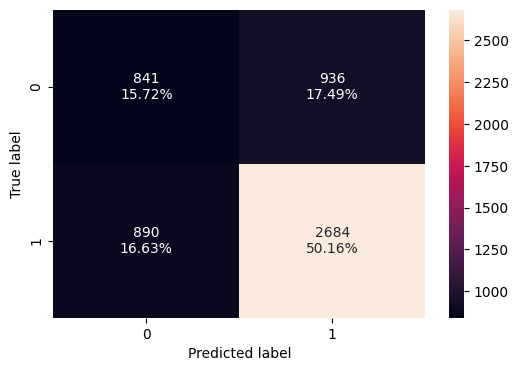

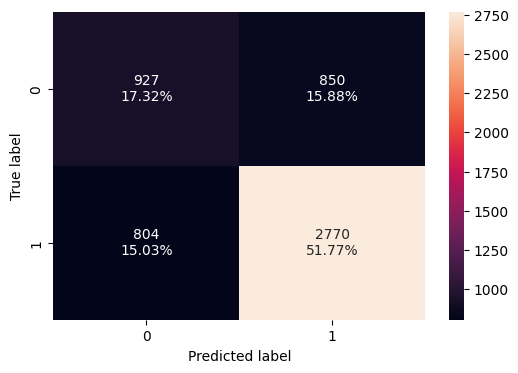

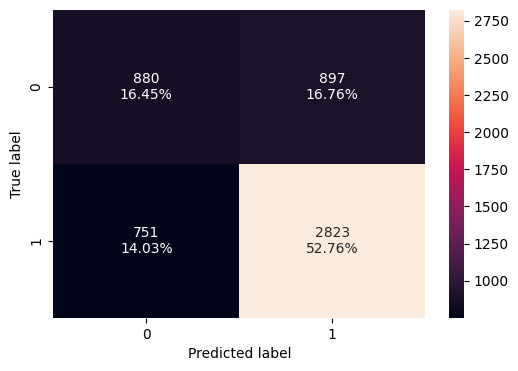

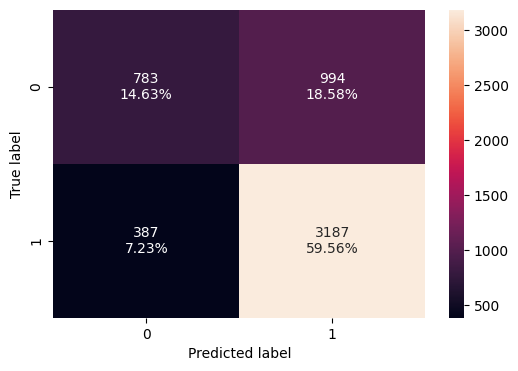

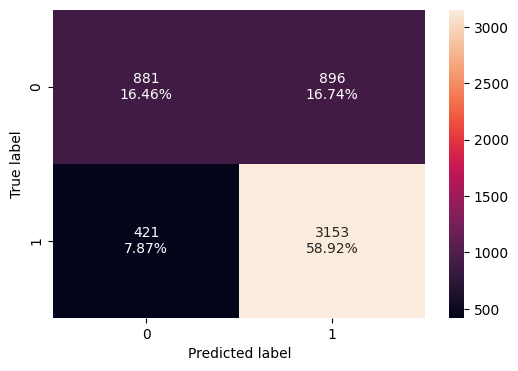

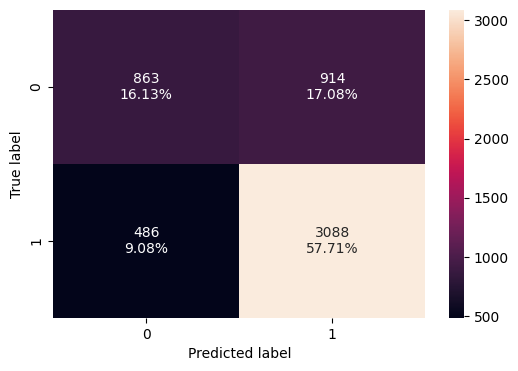

In [ ]:
#Creating confusion matrix for each models :
for name, model in models:
  print("\n{} - Confusion Matrix of the classifier's performance on the Validation dataset:\n".format(name))
  model.fit(X_train, y_train)
  confusion_matrix_sklearn(model,X_val,y_val)


## **Model Building - Oversampled Data**

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 8339
Before Oversampling, counts of label 'No': 4146 

After Oversampling, counts of label 'Yes': 8339
After Oversampling, counts of label 'No': 8339 

After Oversampling, the shape of train_X: (16678, 23)
After Oversampling, the shape of train_y: (16678,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

dtree: 1.0
Bagging: 0.9724187552464324
Random forest: 1.0
Adaboost: 0.7950593596354479
GBM: 0.7976975656553543
XGBoost: 0.861614102410361

Validation Performance:

dtree: 0.7313933967543369
Bagging: 0.7160044767767207
Random forest: 0.7560156687185227
Adaboost: 0.8013430330162283
GBM: 0.8013430330162283
XGBoost: 0.815053161723559


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

dtree: Training Score: 1.0000, Validation Score: 0.7314, Difference: 0.2686
Bagging: Training Score: 0.9724, Validation Score: 0.7160, Difference: 0.2564
Random forest: Training Score: 1.0000, Validation Score: 0.7560, Difference: 0.2440
Adaboost: Training Score: 0.7951, Validation Score: 0.8013, Difference: -0.0063
GBM: Training Score: 0.7977, Validation Score: 0.8013, Difference: -0.0036
XGBoost: Training Score: 0.8616, Validation Score: 0.8151, Difference: 0.0466


* Again GBM appears to have the best performance based on the validation score and the minimal difference between training and validation scores.
* Adaboost is also a good performer, with slightly lower training performance but a very close difference.
* XGBoost performs reasonably well, but there is some degree of overfitting.

Overall, GBM would be the recommended choice based on the data provided.

## **Model Building - Undersampled Data**

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 8339
Before Under Sampling, counts of label 'No': 4146 

After Under Sampling, counts of label 'Yes': 4146
After Under Sampling, counts of label 'No': 4146 

After Under Sampling, the shape of train_X: (8292, 23)
After Under Sampling, the shape of train_y: (8292,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

dtree: 1.0
Bagging: 0.9604438012542209
Random forest: 1.0
Adaboost: 0.7272069464544139
GBM: 0.7551857211770381
XGBoost: 0.8299565846599132

Validation Performance:

dtree: 0.6432568550643537
Bagging: 0.6186345831001678
Random forest: 0.6625629546726357
Adaboost: 0.7185226636821489
GBM: 0.7403469501958589
XGBoost: 0.7025741466144376


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

dtree: Training Score: 1.0000, Validation Score: 0.6433, Difference: 0.3567
Bagging: Training Score: 0.9604, Validation Score: 0.6186, Difference: 0.3418
Random forest: Training Score: 1.0000, Validation Score: 0.6626, Difference: 0.3374
Adaboost: Training Score: 0.7272, Validation Score: 0.7185, Difference: 0.0087
GBM: Training Score: 0.7552, Validation Score: 0.7403, Difference: 0.0148
XGBoost: Training Score: 0.8300, Validation Score: 0.7026, Difference: 0.1274


* GBM stands out as the best-performing model with a validation score of 0.7403 and a small difference from the training score.
* Adaboost also performs well, with a very small difference and a validation score of 0.7185.
* XGBoost performs reasonably well but shows some overfitting.

Overall, GBM is the recommended choice based on the provided data.

- After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as  on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 4 models using the same data (undersampled or oversampled) as we trained them on before

## **Hyperparameter Tuning**

### **Tuning Gradient Boosting model with Undersampled data**

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7222345123686493:
CPU times: user 4.5 s, sys: 483 ms, total: 4.98 s
Wall time: 3min 15s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.8)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.718644,0.746985,0.706916,0.726398


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.720426,0.741186,0.822671,0.779806


### **Tuning Gradient Boosting model with Oversampled data**

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7612180086740852:
CPU times: user 5.61 s, sys: 494 ms, total: 6.1 s
Wall time: 4min 19s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.771915,0.80909,0.753097,0.78009


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.739114,0.814773,0.798683,0.806648


### **Tuning AdaBoostClassifier model with Undersampled data**

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9336718647811996:
CPU times: user 1.38 s, sys: 120 ms, total: 1.5 s
Wall time: 39.4 s


In [ ]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=10, random_state=1)

In [ ]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(tuned_adb1, X_train_un, y_train_un)
adb1_train

,Accuracy,Recall,Precision,F1
0,0.604438,0.933671,0.562973,0.702413


In [ ]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.710148,0.932848,0.717761,0.811291


### **Tuning AdaBoostClassifier model with Oversampled data**

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7632601360974007:
CPU times: user 2.37 s, sys: 194 ms, total: 2.57 s
Wall time: 1min 9s


In [ ]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb2.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=30, random_state=1)

In [ ]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train_over, y_train_over)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.757765,0.806931,0.734687,0.769116


In [ ]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.740049,0.817012,0.798469,0.807634


## **Model Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data
Accuracy,0.718644,0.771915,0.604438,0.757765
Recall,0.746985,0.809090,0.933671,0.806931
Precision,0.706916,0.753097,0.562973,0.734687
F1,0.726398,0.780090,0.702413,0.769116


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb1_val.T,adb2_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data
Accuracy,0.720426,0.739114,0.710148,0.740049
Recall,0.741186,0.814773,0.932848,0.817012
Precision,0.822671,0.798683,0.717761,0.798469
F1,0.779806,0.806648,0.811291,0.807634


**Notes:**

Gradient boosting model trained with Oversampled data has generalised performance, so let's consider it as the best model.

In [ ]:
# Let's check the performance on test set
gbm_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.728938,0.801175,0.794638,0.797893


**Notes:**

- The Gradient Boost model trained on Oversampled data has given ~79% F1 score on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

## **Feature Importance**

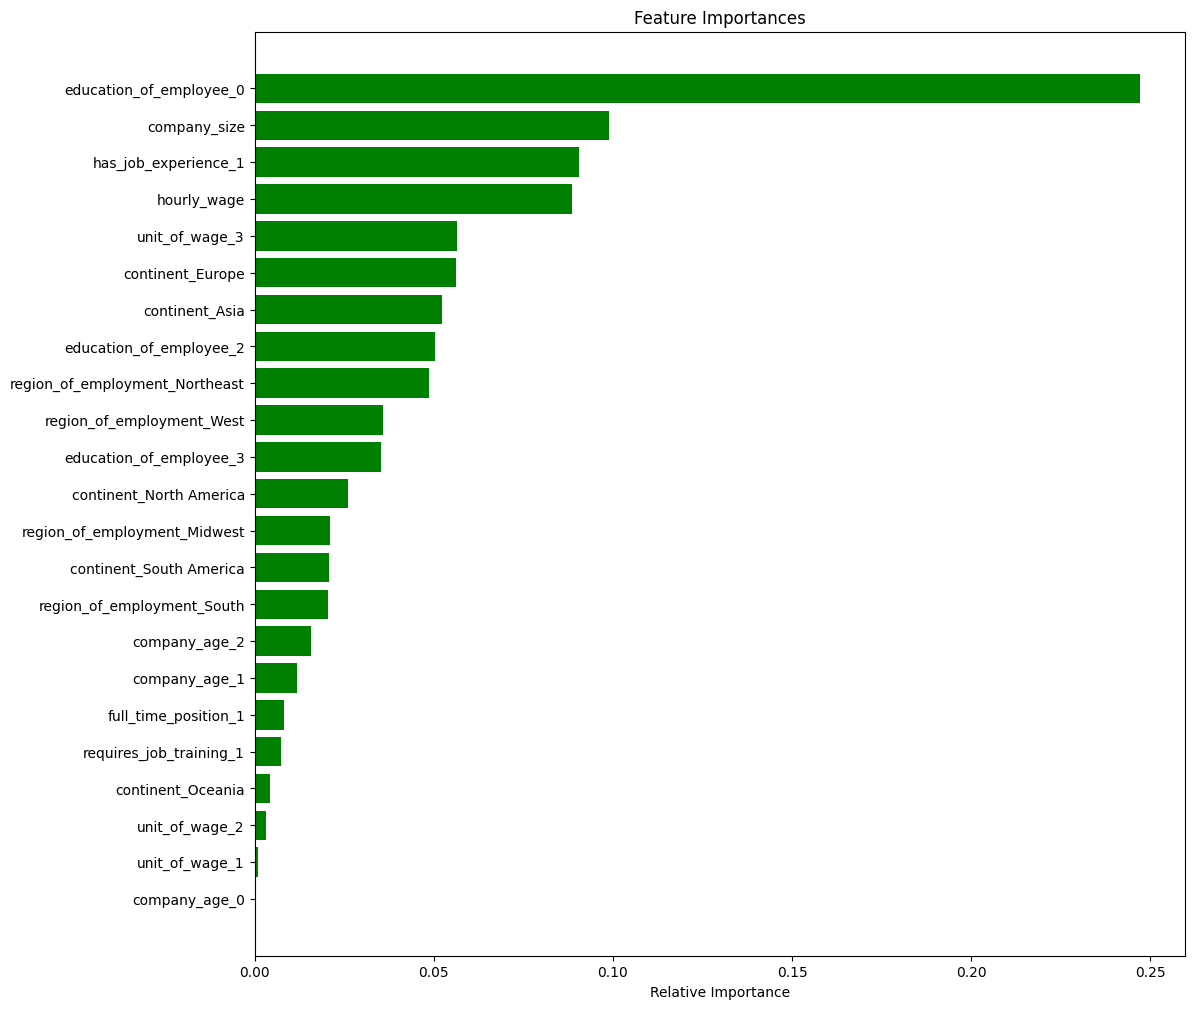

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Notes:**

- We can see that education_of_employee_0, company_size, has_job_expeirence_1 and hourly_wage are the most important features for making predictions

## **Business Insights and Recommendations**

For the Office of Foreign Labor Certification (OFLC), the three most critical components for pre-screening an applicant are:
- Education level :
 An applicant applying for a job requiring a high school diploma will more than likely be denied. Conversely, applications for jobs requiring a Master's degree or doctorate are very likely to be Certified.

- Prior job experience : An applicant applying for a job without any previous job experience is more likley to be denied than an applicant for a job with experience.

- Prevailing wage : The higher the prevailing wage of the job an applicant is applying for, the more likely the application will be Certified. This is especially true for applications for jobs with an yearly unit of wage.

- Continent: Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from Europ and Asia have higher chances of visa certification.

- To prioritize limited resources towards screening a batch of applications for those most likely to be certified, the OFLC can:
Sort applications by level of education and review the higher levels of education first.
Sort applications by previous job experience and review those with experience first.
Divide applications for jobs into those with an hourly wage and those with an annual wage, sort each group by the prevailing wage, then review applications for salaried jobs first from highest to lowest wage.


- Furthermore, OFLC should examine more thoroughly why whether an application will be certified or denied can be very well predicted through just three nodes as shown above.

- For those in less skilled, entry-level, and/or hourly jobs, the system would appear to be biased against these applications being certified.